In [33]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from datetime import datetime


In [2]:
# Loading the data
df= pd.read_csv('device_failure.csv')

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,1/1/2015,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,11/2/2015,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [5]:
# EDA

In [6]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [7]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [9]:
df.dtypes

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object

In [10]:
# checking for duplicates
duplicate_rows_df = df[df.duplicated()]

In [11]:
duplicate_rows_df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9


In [12]:
# Checking the balance in dataset
# imbalanced dataset
df['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [16]:
# attribute 7 and 8 have same values so one of them dropped
df.groupby(['attribute7','attribute8'])['attribute7'].count()

attribute7  attribute8
0           0             123036
6           6                 13
8           8                793
16          16               397
22          22                 2
24          24                65
32          32                35
40          40                20
48          48                36
56          56                 6
72          72                11
80          80                 4
96          96                 7
104         104                3
112         112                2
128         128               23
136         136                1
152         152                2
176         176               20
216         216                1
240         240                1
272         272                2
312         312                5
424         424                1
496         496                1
736         736                4
744         744                1
832         832                2
Name: attribute7, dtype: int64

In [17]:
df=df.drop(columns='attribute8')

In [18]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,1/1/2015,S1F01085,0,215630672,56,0,52,6,407438,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,3


In [19]:
# Plotting histogram for Numerical Columns

In [20]:
df_numerical= df.copy().drop(columns=['date','device'])

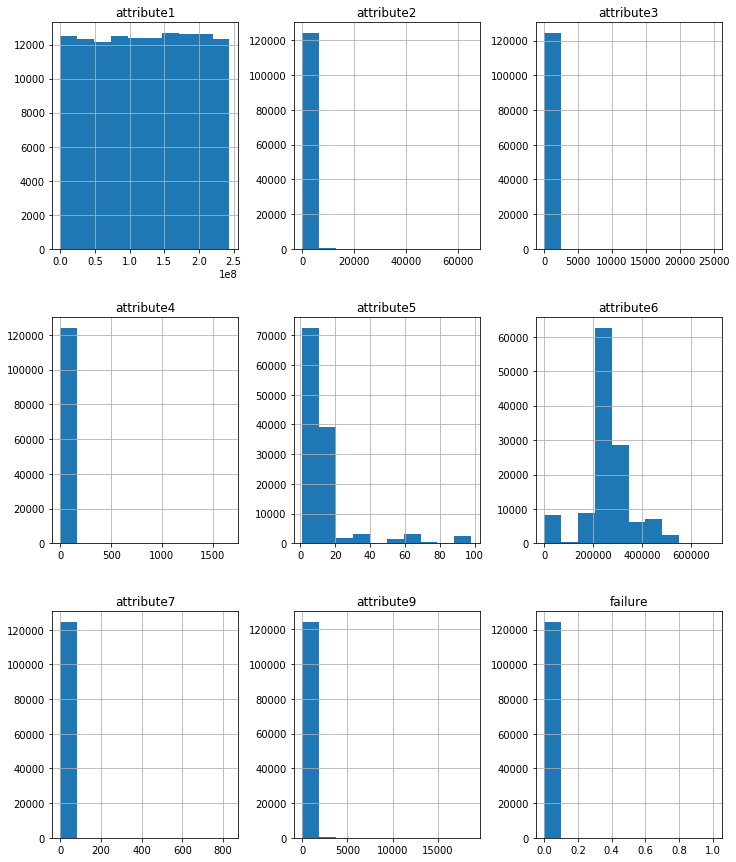

In [21]:
df_numerical.hist(figsize=(12,15));

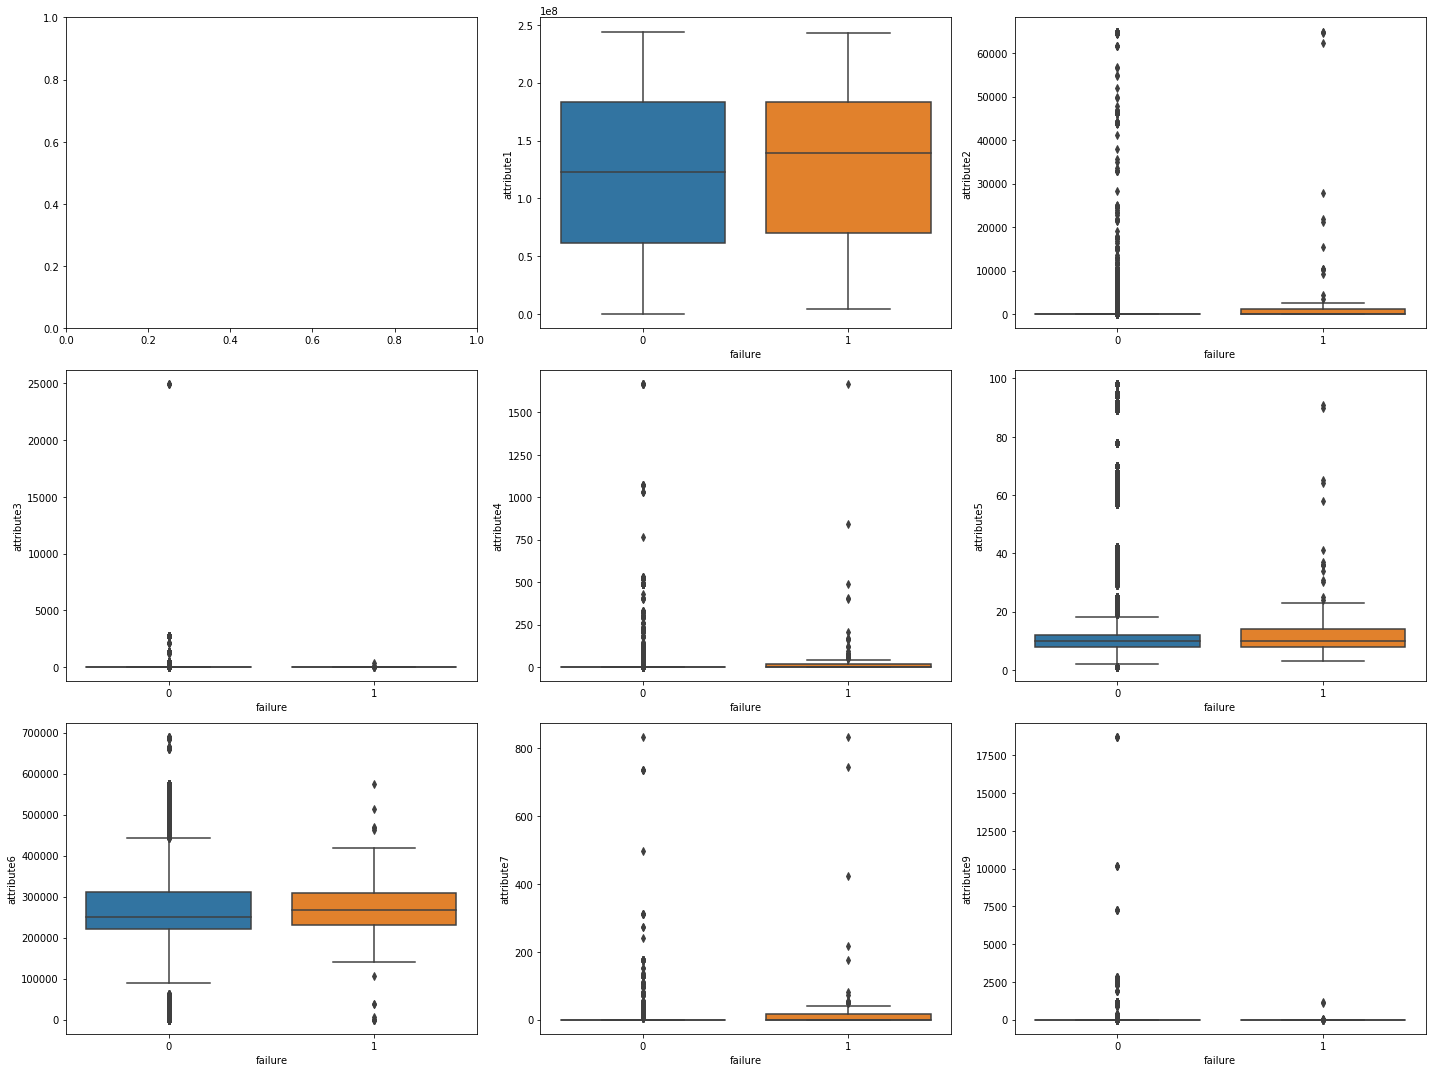

In [26]:
# Box plot
fig, axes = plt.subplots(3, 3, figsize = (20,15))
axes = axes.flatten()

for i in range(1,len(df_numerical.columns)):
    sns.boxplot(x="failure", y=df_numerical.iloc[:,i], data=df_numerical, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

In [27]:
# Compute the correlation matrix
corr = df_numerical.corrwith(df.failure)

In [28]:
corr

failure       1.000000
attribute1    0.001984
attribute2    0.052902
attribute3   -0.000948
attribute4    0.067398
attribute5    0.002270
attribute6   -0.000550
attribute7    0.119055
attribute9    0.001622
dtype: float64

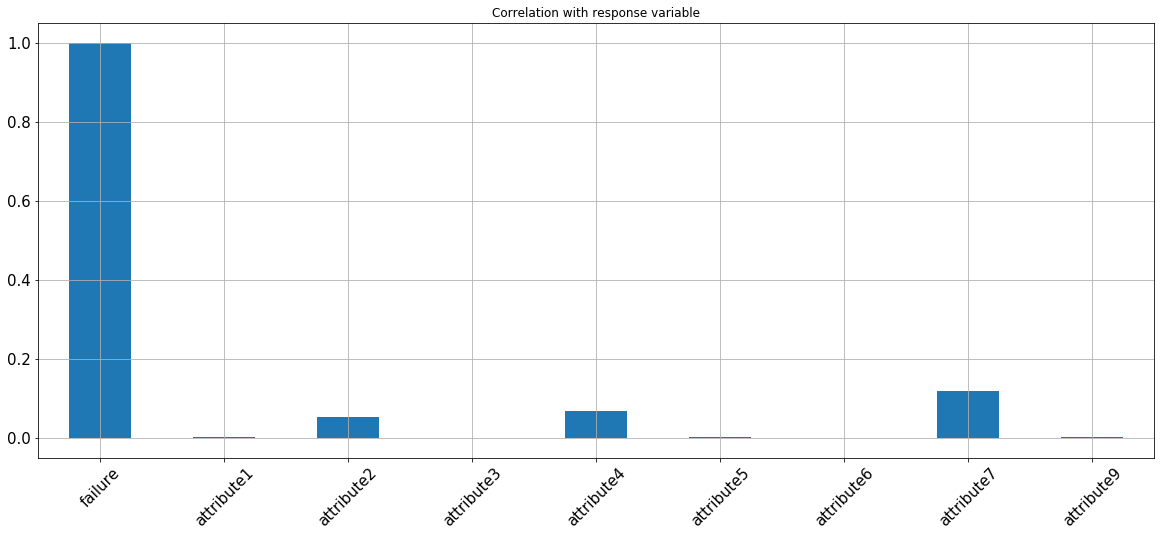

In [29]:
corr.plot.bar(figsize=(20,8),
             title='Correlation with response variable',
             fontsize=15,rot=45, grid=True)

In [30]:
# Compute the correlation matrix
corr2 = df_numerical.corr()

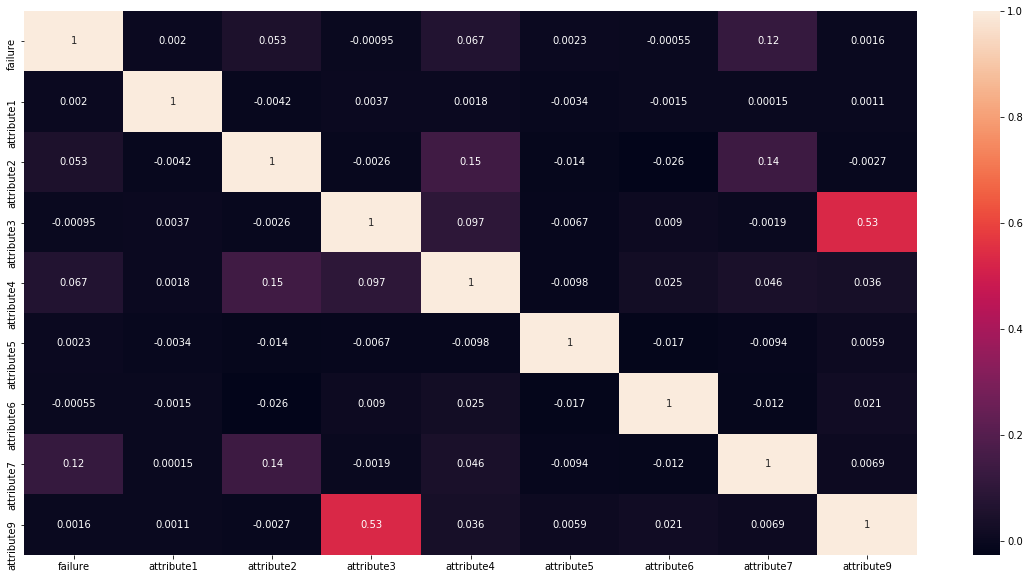

In [31]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
sns.heatmap(corr2,annot=True);

In [34]:
# Calculating the date from date of installation
dt_string = "2/24/2015" 
dt_object = datetime.datetime.strptime(dt_string, format)
df['Age (in days)']=df['date'].apply( lambda x:datetime.datetime.now()-datetime.datetime.strptime(x, format)).astype('timedelta64[D]').astype(int)

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
#Feature Extraction

In [ ]:
# feature_importances
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

In [ ]:
#Applying machine learning algorithms
#Creating a function that will give the Following output when any model is run

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")

In [ ]:
# LR
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0)

clf_LR.fit(x_train,y_train)
print_score(clf_LR, x_train, y_train, x_test, y_test, train=True)
print_score(clf_LR, x_train, y_train, x_test, y_test, train=False)

In [ ]:
# DT
from sklearn.tree import DecisionTreeClassifier
clf_tree= DecisionTreeClassifier(random_state=0)

clf_tree.fit(x_train,y_train)
print_score(clf_tree, x_train, y_train, x_test, y_test, train=True)
print_score(clf_tree, x_train, y_train, x_test, y_test, train=False)

In [ ]:
# RF
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(random_state=0)

clf_rf.fit(x_train,y_train)
print_score(clf_rf, x_train, y_train, x_test, y_test, train=True)
print_score(clf_rf, x_train, y_train, x_test, y_test, train=False)